In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
df.shape

(1000, 9)

In [5]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [8]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [9]:
df.drop('Order_ID', axis=1, inplace=True)

In [10]:
df

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13,3.0,54
996,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [11]:
df['Weather'].value_counts()

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

In [12]:
df['Traffic_Level'].value_counts()

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

In [13]:
df['Time_of_Day'].value_counts()

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

In [14]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

In [15]:
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

In [16]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [17]:
df.isnull().sum()

Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

<Axes: xlabel='Weather', ylabel='Delivery_Time_min'>

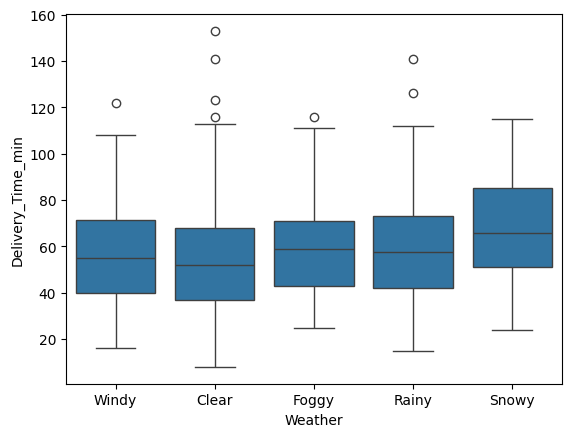

In [18]:
sns.boxplot(x=df['Weather'], y=df['Delivery_Time_min'])

<Axes: xlabel='Time_of_Day', ylabel='Delivery_Time_min'>

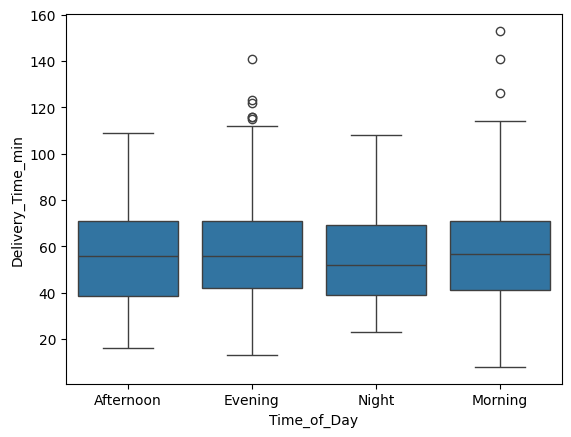

In [19]:
sns.boxplot(x=df['Time_of_Day'], y=df['Delivery_Time_min'])

<Axes: xlabel='Traffic_Level', ylabel='Delivery_Time_min'>

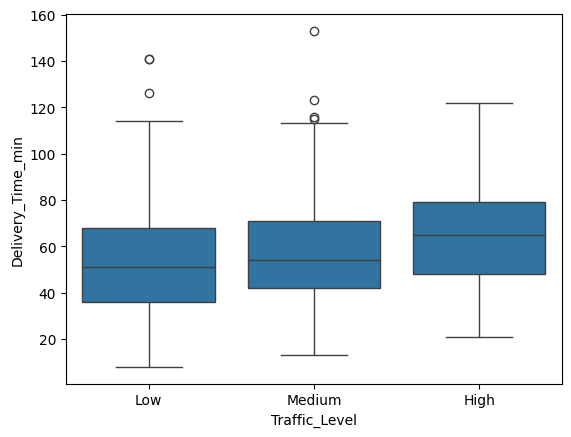

In [20]:
sns.boxplot(x=df['Traffic_Level'], y=df['Delivery_Time_min'])

<Axes: xlabel='Vehicle_Type', ylabel='Delivery_Time_min'>

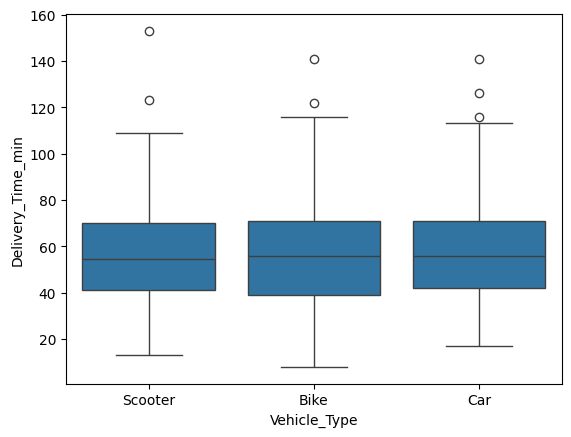

In [21]:
sns.boxplot(x=df['Vehicle_Type'], y=df['Delivery_Time_min'])

<Axes: xlabel='Distance_km', ylabel='Delivery_Time_min'>

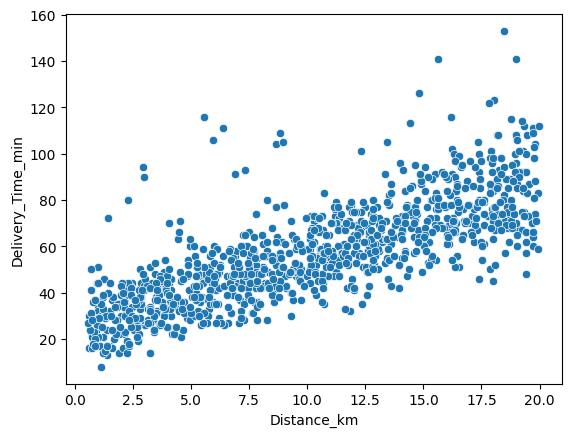

In [22]:
sns.scatterplot(x=df['Distance_km'], y=df['Delivery_Time_min'])

<Axes: >

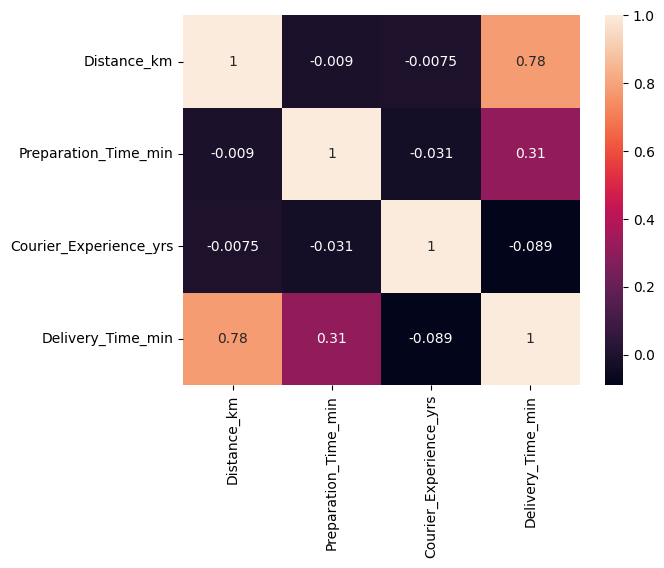

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [24]:
from scipy.stats import f_oneway

In [25]:
categorical_features = ['Weather','Time_of_Day','Traffic_Level','Vehicle_Type']

In [26]:
for feature in categorical_features:
    groups = [df[df[feature] == category]['Delivery_Time_min'] for category in df[feature].unique()]
    f_test, p_value = f_oneway(*groups)
    if p_value > 0.05:
        print(f'{feature}:\n    Static Value:{f_test}\n    p_value:{p_value}\n    Drop feature')
    else:
        print(f'{feature}:\n    Static Value:{f_test}\n    p_value:{p_value}\n    Keep Feature')

Weather:
    Static Value:10.499059475928275
    p_value:2.472288388818336e-08
    Keep Feature
Time_of_Day:
    Static Value:0.3467656622540361
    p_value:0.7915076876030978
    Drop feature
Traffic_Level:
    Static Value:19.751338347737303
    p_value:3.86970694692821e-09
    Keep Feature
Vehicle_Type:
    Static Value:0.5893743449801336
    p_value:0.554867344896123
    Drop feature


In [27]:
X = df.drop(['Delivery_Time_min'], axis=1)
y = df['Delivery_Time_min']

In [28]:
X

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0
1,16.42,Clear,Medium,Evening,Bike,20,2.0
2,9.52,Foggy,Low,Night,Scooter,28,1.0
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0
4,19.03,Clear,Low,Morning,Bike,16,5.0
...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13,3.0
996,16.28,Rainy,Low,Morning,Scooter,8,9.0
997,15.62,Snowy,High,Evening,Scooter,26,2.0
998,14.17,Clear,Low,Afternoon,Bike,8,0.0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [30]:
cat_columns = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
le = LabelEncoder()
for col in cat_columns:
    X[col] = le.fit_transform(X[col])

In [31]:
X

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,7.93,4,1,0,2,12,1.0
1,16.42,0,2,1,0,20,2.0
2,9.52,1,1,3,2,28,1.0
3,7.44,2,2,0,2,5,1.0
4,19.03,0,1,2,0,16,5.0
...,...,...,...,...,...,...,...
995,8.50,0,0,1,1,13,3.0
996,16.28,2,1,2,2,8,9.0
997,15.62,3,0,1,2,26,2.0
998,14.17,0,1,0,0,8,0.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
X_train

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
29,18.05,0,2,1,2,10,7.0
535,2.14,0,0,1,0,18,3.0
695,3.23,0,0,0,0,17,9.0
557,7.51,2,1,1,1,27,6.0
836,4.62,2,2,0,1,8,3.0
...,...,...,...,...,...,...,...
106,17.59,0,1,2,0,24,6.0
270,9.39,0,1,2,0,14,2.0
860,16.38,0,2,2,0,6,2.0
435,16.73,4,0,0,2,9,7.0


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [35]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [36]:
y_pred_dt = dt_model.predict(X_test)

In [37]:
print('r2_score :', r2_score(y_test, y_pred_dt))
print('mean_absolute_error :', mean_absolute_error(y_test, y_pred_dt))
print('mean_squared_error :', mean_squared_error(y_test, y_pred_dt))
print('root_mean_squared_error :', np.sqrt(mean_squared_error(y_test, y_pred_dt)))

r2_score : 0.4939617366848571
mean_absolute_error : 10.56
mean_squared_error : 226.82
root_mean_squared_error : 15.060544478869282


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred_rf = rf_model.predict(X_test)

In [41]:
print('r2_score :', r2_score(y_test, y_pred_rf))
print('mean_absolute_error :', mean_absolute_error(y_test, y_pred_rf))
print('mean_squared_error :', mean_squared_error(y_test, y_pred_rf))
print('root_mean_squared_error :', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

r2_score : 0.7766376878589246
mean_absolute_error : 7.0645500000000006
mean_squared_error : 100.1170135
root_mean_squared_error : 10.005848964480725


In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
from scipy.stats import randint
params = {
    'n_estimators':randint(100, 1001),
    'max_features':randint(1, X.shape[1] + 1),
    'max_depth':randint(5,31),
    'min_samples_split':randint(2,21),
    'min_samples_leaf':randint(1,11)
}

In [44]:
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=params,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....0019F49FBD090>, 'max_features': <scipy.stats....0019F49FBCE10>, 'min_samples_leaf': <scipy.stats....0019F49F7AB10>, 'min_samples_split': <scipy.stats....0019F49F7A9E0>, ...}"
,n_iter,100
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [45]:
import pickle

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Re-apply Label Encoding to capture the encoders
# We need to recreate a fresh copy of the original DataFrame to ensure correct encoding without previous modifications
# df_original_for_encoding = pd.read_csv("Food_Delivery_Times.csv")

# # Perform the same cleaning steps as before
# df_original_for_encoding['Weather'] = df_original_for_encoding['Weather'].fillna(
#     df_original_for_encoding['Weather'].mode()[0]
# )

# df_original_for_encoding['Traffic_Level'] = df_original_for_encoding['Traffic_Level'].fillna(
#     df_original_for_encoding['Traffic_Level'].mode()[0]
# )

# df_original_for_encoding['Vehicle_Type'] = df_original_for_encoding['Vehicle_Type'].fillna(
#     df_original_for_encoding['Vehicle_Type'].mode()[0]
# )

# df_original_for_encoding['Time_of_Day'] = df_original_for_encoding['Time_of_Day'].fillna(
#     df_original_for_encoding['Time_of_Day'].mode()[0]
# )

# df_original_for_encoding['Courier_Experience_yrs'] = df_original_for_encoding['Courier_Experience_yrs'].median()

# df_original_for_encoding.drop('Order_ID', axis=1, inplace=True)

# # Identify categorical columns
# categorical_cols = df_original_for_encoding.select_dtypes(include='object').columns

# label_encoders = {}

# for col in categorical_cols:
#     le = LabelEncoder()
#     df_original_for_encoding[col] = le.fit_transform(df_original_for_encoding[col])
#     label_encoders[col] = le
#     print(f"LabelEncoder for '{col}' created and stored.")

# # Save the optimized Random Forest model
# with open("optimized_rf_model.pkl", "wb") as file:
#     pickle.dump(rf_model, file)

# print("Optimized Random Forest model saved as 'optimized_rf_model.pkl'")

# with open("label_encoders.pkl", "wb") as file:
#     pickle.dump(label_encoders, file)

# print("Label Encoders saved as 'label_encoders.pkl'")